# Supplementary Figure 10b

## Install and read the R packages

In [ ]:
install.packages("data.table")
install.packages("TDAstats")
install.packages("gridExtra")
library(data.table)
library(TDAstats)
library(tidyverse)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


Attaching package: ‘gri

## Download and read the persistence diagram data in Supplementary Figure 10

In [ ]:
system("wget https://www.dropbox.com/s/zpx9w9wnu3p7n29/persistence_diagram.zip")
system("unzip /content/persistence_diagram.zip")
files <- list.files("/content/persistence_diagram",full.names=TRUE)
files <- files[grep("all_signal",files)]
files <- files[grep("639",files)]
days <- sapply(strsplit(basename(files),"_"),function(x){x[2]})
days[days=="ctrl"] <- 0
days <- gsub("d","",days)
days <- as.numeric(days)
files <- files[sort.list(days)]
samples <- sapply(strsplit(basename(files),"_"),function(x){x[3]})
samples <- samples[grep("pd1",files)]
file1 <- files[grep("pd1",files)]
file2 <- files[grep("pd2",files)]

## Supplementary Figure 10

In [ ]:
filename <- sapply(strsplit(basename(file1),"_"),function(x){paste(x[2:3],collapse="_")})
out1 <- paste0("fig7g_suppl_fig10b_",filename,".tsv")
out2 <- paste0("fig7g_suppl_fig10b_",filename,".pdf")
p <- vector("list",length(file1))
for(i in 1:length(file1)){
  cat(i,"/",length(file1),"\n")
  junk <- rbind(cbind(1,as.matrix(fread(file1[i],sep=" ",header=FALSE))),
                        cbind(2,as.matrix(fread(file2[i],sep=" ",header=FALSE))))
  colnames(junk) <- c("dimension","birth","death")
  id <- which(junk[,2]>junk[,3])
  if(length(id)>0) junk <- junk[-id,]
  write.table(junk,out1[i],row.names=FALSE,col.names=TRUE,sep="\t",quote=FALSE)
  p[[i]] <- plot_persist(junk) +
            ggtitle(filename[i]) +
            theme(plot.title = element_text(hjust = 0.3))
}


1 / 17 
2 / 17 
3 / 17 
4 / 17 
5 / 17 
6 / 17 
7 / 17 
8 / 17 
9 / 17 
10 / 17 
11 / 17 
12 / 17 
13 / 17 
14 / 17 
15 / 17 
16 / 17 
17 / 17 


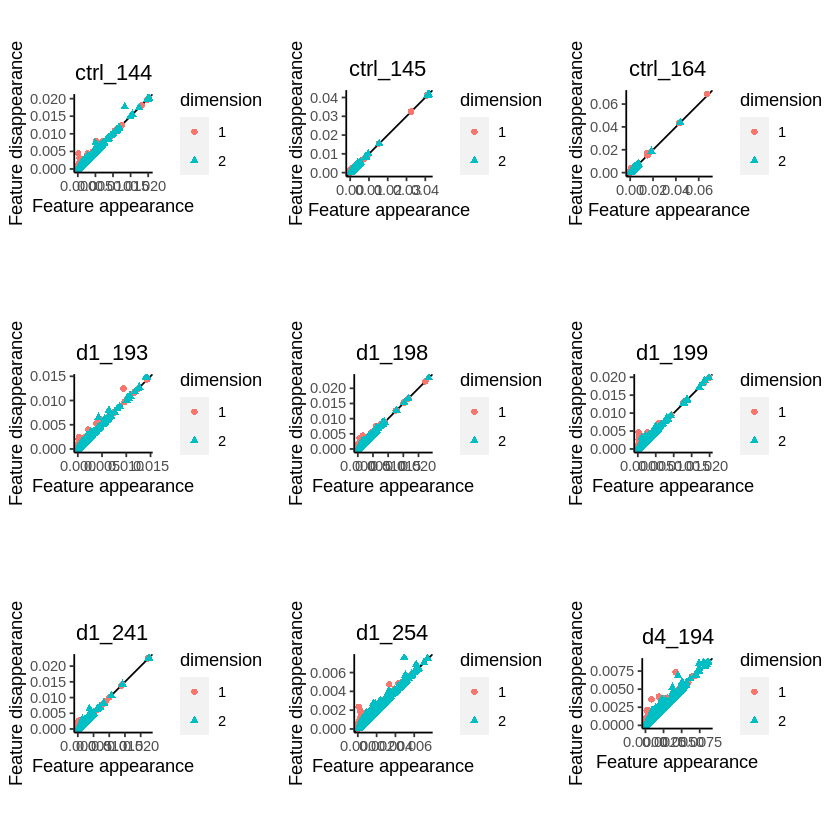

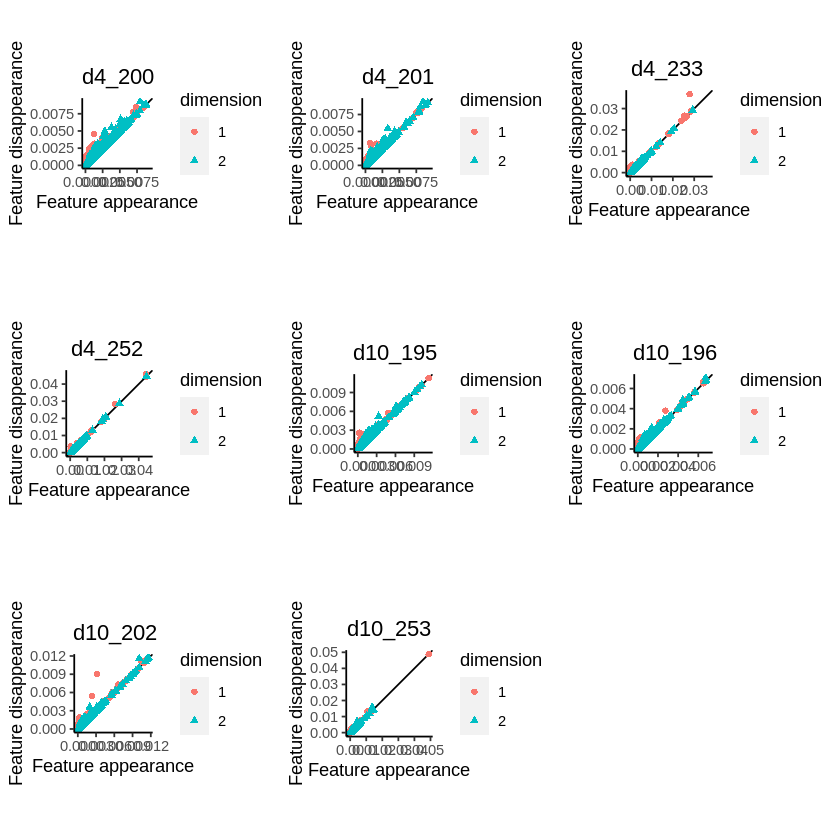

In [ ]:
grid.arrange(p[[1]], p[[2]], p[[3]],
p[[4]], p[[5]], p[[6]],
p[[7]], p[[8]], p[[9]], nrow = 3)
grid.arrange(p[[10]], p[[11]], p[[12]],
p[[13]], p[[14]], p[[15]],
p[[16]], p[[17]], nrow = 3)